## How to implement Robust Regression with python... 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Statistical-Learning-EE575/blob/master/Tutorial2/main.ipynb)

- The topics covered in this exercise are: 

- [Data Generation](#data-generation)
- [Least Square Regression](#least-square-regression-model)  
- [Robust Regression Model](#robust-regression-model) 
- [Robust Regression Model with Huber Loss **](#robust-regression-with-huber-loss) 
- [Weighted Least Square **](#weighted-least-square)

** Denotes the parts that you have to fill up with correct Python commands...  

In [ ]:
! pip install numpy pandas tqdm matplotlib statsmodels ISLP

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

### Data Generation

In [2]:
nsample = 50
x1   = np.linspace(0, 20, nsample)
X    = np.column_stack((x1, (x1 - 5) ** 2))
X    = sm.add_constant(X)
sig  = 0.3  # smaller error variance makes OLS<->RLM contrast bigger
beta = [5, 0.5, -0.0]
Y    = np.dot(X, beta)
Ym   = Y + sig * 1.0 * np.random.normal(size=nsample)
Ym[[39, 41, 43, 45, 48]] -= 5  # add some outliers (10% of nsample)

### Least Square Regression Model

In [3]:
model       = sm.OLS(Ym, X)
OLS_model   = model.fit()  
OLS_predict = OLS_model.predict(X)  

### Robust Regression Model

In [4]:
resrlm        = sm.RLM(Ym, X)
resrl_model   = resrlm.fit()  
resrl_predict = resrl_model.predict(X) 

### Check resrl_model.fittedvalues vs. resrl_model.predict()

In [ ]:
resrl_model.fittedvalues == resrl_model.predict()

### Plot the x and y

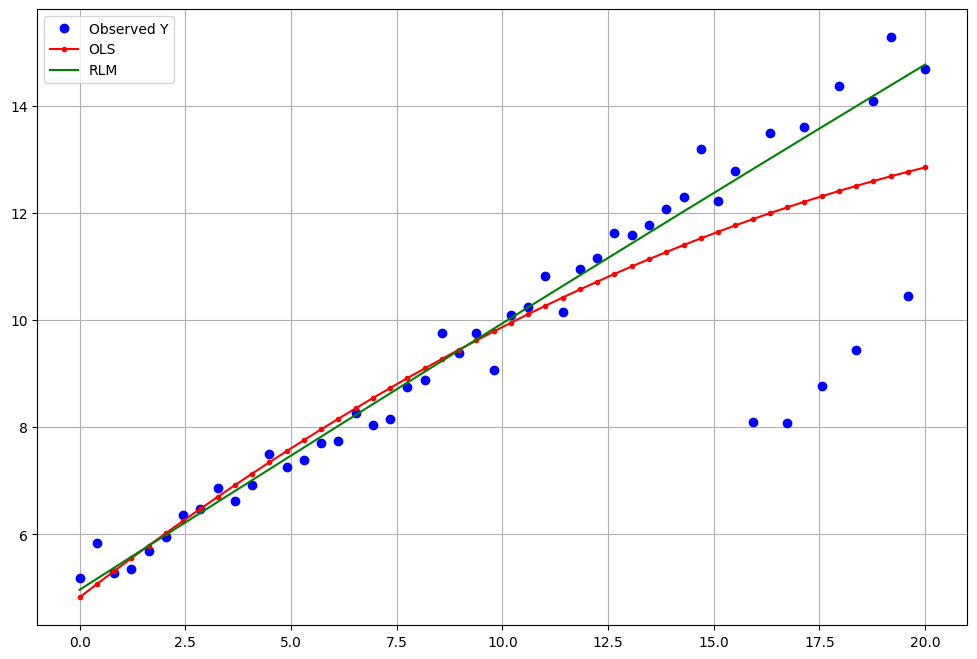

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111) 
ax.plot(x1, Ym, "bo", label="Observed Y") 
ax.plot(x1, OLS_predict,   "r.-", label="OLS")
ax.plot(x1, resrl_predict, "g-", label="RLM") 
ax.legend(loc="best")
ax.grid(True)
plt.savefig("RobustRegression_VS_LeastSquareRegression.png")
plt.show()

## Robust Regression with Huber Loss

From sm.RLM apply the Hubber loss function

In [7]:
resrlm_huber         =   # << Your code is here.
resrlm_huber_predict =   # << Your code is here.

### Plot the x and y

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111) 
ax.plot(x1, Ym, "bo", label="Observed Y") 
ax.plot(x1, OLS_predict,   "r.-", label="OLS")
ax.plot(x1, resrl_predict, "g-", label="RLM") 
ax.plot(x1, resrlm_huber_predict, "c--", label="Huber-RLM") 
ax.legend(loc="best")
ax.grid(True)
plt.savefig("HuberRobustRegression_VS_LeastSquareRegression.png")
plt.show()

## Weighted Least Square

Initialize the weights for weighted least square (WLS)

In [10]:
W = np.arange(1,51)

### Apply the `sm.WLS` function from `statsmodels.api` 
- Train the model with .fit()
- And perform the prediction by .predict(X)

In [11]:
wls_model = sm.WLS(Y,X, weights=list(W)) 
wls_model = wls_model.fit()

wls_model_predict = wls_model.predict(X) 

### Implementation of the weighted least square

In [ ]:
def WLS(X, W, Y):

    # Normal equations of weighted least squares
    XtWX = X.T @ W @ X
    XtWz = X.T @ W @ Y
    b = np.linalg.inv(XtWX) @ XtWz

    return b

### Apply the WLS function and get the prediction

- At first, you should convert `W` as a diagonoal matrix
- Reshape Y as nx1 array

In [ ]:
W = np.diag(W)
Y = Y.reshape(50,1)

Apply X, W, and Y to WLS() function 
and calculate the prediction into y_WLS 
You will have to perform the matrix multiplication between b and X.

In [13]:
b = WLS(X, W, Y)
y_WLS =             # << Your code is here.

### Compare `b` and `wls_model.params` and plot the x and y

In [ ]:
print(b)
print(wls_model.params)

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111) 
ax.plot(x1, Ym, "bo", label="Observed Y") 
ax.plot(x1, OLS_predict,   "r.-", label="OLS")
ax.plot(x1, resrl_predict, "g-", label="RLM") 
ax.plot(x1, resrlm_huber_predict, "c--", label="Huber-RLM") 
ax.plot(x1, wls_model_predict, color="orange", linestyle = "--", label="WLS") 
ax.plot(x1, y_WLS, color="magenta", linestyle = ":", label="WLS-manual") 
ax.legend(loc="best")
ax.grid(True)
plt.savefig("HuberRobustRegression_VS_LeastSquareRegression.png")
plt.show()